<a href="https://colab.research.google.com/github/shryu8902/KIRD_AUTOML/blob/main/KIRD_Day_2_2_NN_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝 with Keras

케라스는 딥러닝을 위한 텐서플로우 (tensorflow) 기반 하이레벨 API 입니다.


## 1. 기본 Keras 코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [ ]:
# 당뇨 데이터셋 불러오기
raw_data = load_diabetes()
print(raw_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
# 입력 특성과 타겟 변수 나누기
X = raw_data.data
y = raw_data.target

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 모델 구성
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [ ]:
# 테스트 데이터로 예측
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 3ms/step


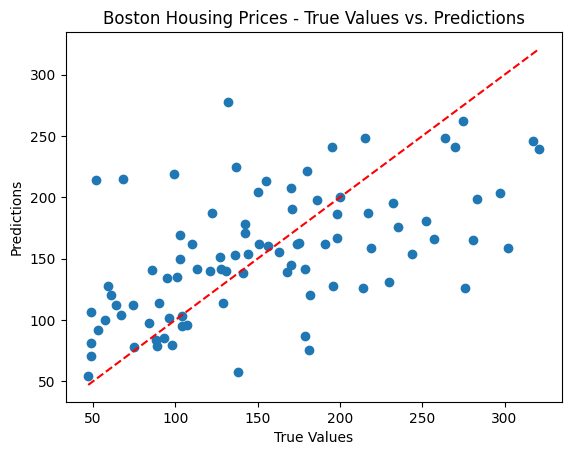

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # x=y 그래프
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Boston Housing Prices - True Values vs. Predictions')
plt.show()

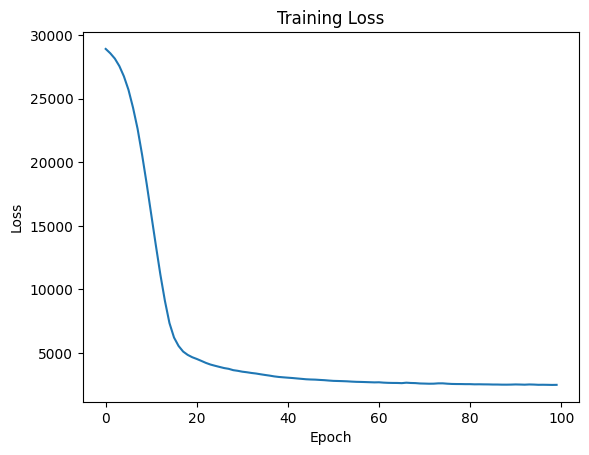

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn import metrics

# MAE (Mean Absolute Error)
mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# MAPE (Mean Absolute Percentage Error)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape*100:.2f}%")

# R2 Score (coefficient of determination)
r2 = metrics.r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


MAE: 46.34
MAPE: 37.08%
R2 Score: 0.29


## 2. 텐서플로우 주요 레이어의 동작 확인

In [ ]:
# 기본 Dense layer
import tensorflow as tf

x = tf.ones((100,10))
y = tf.keras.layers.Dense(20)(x)
print(y[0])
print(y.shape)

tf.Tensor(
[-0.02114236 -0.26937884 -0.14023125 -1.3243799   0.85108584  0.31750202
  0.5892035   0.29753083  0.41936466 -1.16449     1.1314337  -2.2844262
 -0.7203632   0.37939352  0.22943044 -0.25335866  1.0397267   0.29309672
 -0.03302133  0.05817726], shape=(20,), dtype=float32)
(100, 20)


In [ ]:
x = tf.ones((100,10))
y = tf.keras.layers.Dense(20, activation='relu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[0.         0.         0.29999536 0.         1.128813   0.9141826
 0.         0.         0.         0.         0.7937137  0.10884088
 0.         0.         0.73168445 0.6924164  0.         0.10376501
 0.4306449  0.        ], shape=(20,), dtype=float32)
(100, 20)


In [ ]:
x = tf.ones((100,3,10))
y = tf.keras.layers.Dense(20, activation='selu')(x)
print(y[0])
print(y.shape)

tf.Tensor(
[[-0.4612942  -1.2607166   0.6381864  -1.0042187   1.7762218  -0.73869854
   0.9379199   0.64424336 -1.2065094   0.8090192  -0.57249284  0.08140461
   0.09970669 -0.44855723 -0.21643102  0.16648975  0.8828404  -0.4644177
   0.59270096 -0.92315143]
 [-0.4612942  -1.2607166   0.6381864  -1.0042187   1.7762218  -0.73869854
   0.9379199   0.64424336 -1.2065094   0.8090192  -0.57249284  0.08140461
   0.09970669 -0.44855723 -0.21643102  0.16648975  0.8828404  -0.4644177
   0.59270096 -0.92315143]
 [-0.4612942  -1.2607166   0.6381864  -1.0042187   1.7762218  -0.73869854
   0.9379199   0.64424336 -1.2065094   0.8090192  -0.57249284  0.08140461
   0.09970669 -0.44855723 -0.21643102  0.16648975  0.8828404  -0.4644177
   0.59270096 -0.92315143]], shape=(3, 20), dtype=float32)
(100, 3, 20)


In [ ]:
# Convolution layer
x = tf.ones((100, 32, 32, 3))
conv_layer = tf.keras.layers.Conv2D(16, kernel_size=(3, 3))
y = conv_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[[[ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  ...
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]]

 [[ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  ...
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.62567335
   -0.58985496]
  [ 0.15926678 -0.5354266   0.07550141 ... -0.6327461  -0.6256

In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer = tf.keras.layers.LSTM(64)
y = lstm_layer(x)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor(
[ 0.41524258 -0.08113306  0.23876591  0.26216227  0.21961346 -0.18857718
 -0.3576368  -0.48978075  0.2578544   0.17102201 -0.2103363  -0.15535785
 -0.05947609  0.29848236  0.06670788 -0.18941678 -0.04239445 -0.04713926
  0.1546987  -0.24254873 -0.179846   -0.36347485 -0.1866643   0.24693832
  0.2953274  -0.38907593 -0.31140962  0.430104   -0.13667175  0.03193688
 -0.26111647 -0.0584886   0.36379632 -0.3079898   0.21167736  0.02809984
  0.19664444 -0.3817192  -0.2287812   0.15662892  0.29048067  0.21077119
  0.3693508  -0.30350357 -0.21542175 -0.48446378 -0.00850243  0.37060127
 -0.31663892 -0.19459358 -0.44095153  0.34055018 -0.04257359 -0.09661432
  0.34661344 -0.22511415  0.20284326  0.352514    0.22174212 -0.33794656
  0.32136473 -0.60753816 -0.49772012 -0.55776364], shape=(64,), dtype=float32)
(100, 64)


In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
y2 = lstm_layer2(y1)
# 출력 확인
print(y1[0])
print(y1.shape)

ValueError: ignored

In [ ]:
# LSTM layer
x = tf.ones((100, 10, 32))
lstm_layer1 = tf.keras.layers.LSTM(64, return_sequences=True)
lstm_layer2 = tf.keras.layers.LSTM(64)
y1 = lstm_layer1(x)
y2 = lstm_layer2(y1)
# 출력 확인
# print(y1[0])
print(y1.shape)

(100, 10, 64)


In [ ]:
# Dropout 레이어

x = tf.ones((100, 10))
dropout_layer = tf.keras.layers.Dropout(0.5)
y1 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
y2 = dropout_layer(x, training=True)  # training=True로 설정하여 학습 모드로 설정
# 출력 확인
print(y1[0])
print(y2[0])
print(y.shape)

tf.Tensor([0. 0. 0. 2. 2. 0. 0. 0. 2. 0.], shape=(10,), dtype=float32)
tf.Tensor([0. 0. 2. 2. 2. 0. 0. 2. 0. 0.], shape=(10,), dtype=float32)
(100, 64)


In [ ]:
x = tf.ones((100, 10))
batchnorm_layer = tf.keras.layers.BatchNormalization()
y = batchnorm_layer(x, training=True)

# 출력 확인
print(y[0])
print(y.shape)

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)
(100, 10)


## 3. 모델 구성

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# 모델 구성
model = Sequential()
model.add(Dense(64, input_shape=(10,)))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.5))
model.add(Dense(1)) # 분류모델인경우 model.add(Dense(1), activation = 'sigmoid')

# 모델 컴파일
model.compile(optimizer='adam', loss='mse') # 마찬가지로 분류모델의 경우 model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                

## 4. 모델 학습 및 다루기

In [ ]:
# 모델 트레이닝 관련
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3)  # 3 에포크 동안 개선이 없으면 학습 조기 종료
hist = model.fit(X_train, y_train,
          validation_data=(X_train[:10], y_train[:10]),
          epochs = 50,
          callbacks=[early_stopping]) # validation set 필요


Epoch 1/50
12/12 [==============================] - 2s 20ms/step - loss: 29088.5137 - val_loss: 21315.8301
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 28929.9824 - val_loss: 21177.8164
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 28754.3965 - val_loss: 21029.2715
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 28538.6973 - val_loss: 20858.8340
Epoch 5/50
12/12 [==============================] - 0s 6ms/step - loss: 28273.4766 - val_loss: 20647.1211
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 28032.7969 - val_loss: 20406.8945
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 27508.5586 - val_loss: 20096.9238
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 27221.7031 - val_loss: 19719.7402
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 26565.7793 - val_loss: 19265.9180
Epoch 10/50
12/12 [==========================

In [ ]:
from keras.callbacks import ModelCheckpoint

# 모델 저장 콜백 설정
checkpoint = ModelCheckpoint('./best_model.h5', save_best_only=True, save_weights_only=False)

# 모델 학습 시 콜백 사용
model.fit(X_train, y_train,
        validation_data=(X_train[:10], y_train[:10]),
        epochs = 50,
        callbacks=[checkpoint], verbose = 0)

In [ ]:
from keras.models import load_model

best_model = load_model('./best_model.h5')

# 테스트 데이터에 대해 예측 수행
predictions = best_model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


# Keras with Optuna

하이퍼파라미터 최적화 라이브러리인 Optuna를 keras 와 함께 사용할 수 도 있습니다.
마찬가지로 네트워크의 파라미터를 고려한 최적화 함수를 구성하면됩니다.

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00


In [ ]:
import optuna
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import np_utils

def objective(trial):

    # 모델 정의
    num_layers = trial.suggest_int('num_layers', 1, 3)
    model = Sequential()
    for i in range(num_layers):
        num_units = trial.suggest_categorical('num_units_layer{}'.format(i), [32, 64])
        activation = trial.suggest_categorical('activation_layer{}'.format(i), ['relu', 'tanh'])
        model.add(Dense(units=num_units, activation=activation))
    model.add(Dense(1))

    # 옵티마이저 선택
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    optimizer = RMSprop(learning_rate=lr)

    model.compile(loss='mean_squared_error', optimizer=optimizer)  # 회귀 문제이므로 손실함수로 MSE 사용

    model.fit(X_train, y_train,
              epochs=2,
              batch_size=128)

    # 검증셋에서의 손실을 구합니다.
    val_loss = model.evaluate(X_test, y_test, verbose=0)
    return val_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('  Value: ', trial.value)
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


[I 2023-07-03 12:20:34,923] A new study created in memory with name: no-name-abd47747-4bff-41e3-8e06-7283c6685c76


Epoch 1/2


<ipython-input-27-52dbcf8cc773>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)


3/3 [==============================] - 1s 8ms/step - loss: 29111.4453
Epoch 2/2
3/3 [==============================] - 0s 7ms/step - loss: 29102.4023


[I 2023-07-03 12:20:36,002] Trial 0 finished with value: 28909.513671875 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'num_units_layer1': 64, 'activation_layer1': 'tanh', 'lr': 0.0001411791895173174}. Best is trial 0 with value: 28909.513671875.


Epoch 1/2
3/3 [==============================] - 1s 7ms/step - loss: 29159.9180
Epoch 2/2
3/3 [==============================] - 0s 8ms/step - loss: 29101.1387


[I 2023-07-03 12:20:37,009] Trial 1 finished with value: 28872.908203125 and parameters: {'num_layers': 2, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'relu', 'lr': 0.0004603249450295794}. Best is trial 1 with value: 28872.908203125.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 29247.1113
Epoch 2/2
3/3 [==============================] - 0s 7ms/step - loss: 29238.7930


[I 2023-07-03 12:20:37,773] Trial 2 finished with value: 29038.826171875 and parameters: {'num_layers': 2, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 32, 'activation_layer1': 'tanh', 'lr': 6.027269556014778e-05}. Best is trial 1 with value: 28872.908203125.


Epoch 1/2
3/3 [==============================] - 0s 6ms/step - loss: 28988.3594
Epoch 2/2
3/3 [==============================] - 0s 9ms/step - loss: 28777.3945


[I 2023-07-03 12:20:38,414] Trial 3 finished with value: 28499.08984375 and parameters: {'num_layers': 1, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'lr': 0.006655422340809868}. Best is trial 3 with value: 28499.08984375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29139.4512
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29114.2832


[I 2023-07-03 12:20:39,007] Trial 4 finished with value: 28904.232421875 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'lr': 0.00037108917913553216}. Best is trial 3 with value: 28499.08984375.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 29103.7617
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 29100.5020


[I 2023-07-03 12:20:39,819] Trial 5 finished with value: 28886.7890625 and parameters: {'num_layers': 3, 'num_units_layer0': 32, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'tanh', 'num_units_layer2': 32, 'activation_layer2': 'relu', 'lr': 1.4506393479611323e-05}. Best is trial 3 with value: 28499.08984375.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 29086.3066
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 28946.2383


[I 2023-07-03 12:20:40,634] Trial 6 finished with value: 28670.685546875 and parameters: {'num_layers': 3, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'tanh', 'num_units_layer2': 32, 'activation_layer2': 'tanh', 'lr': 0.00033343460630245}. Best is trial 3 with value: 28499.08984375.


Epoch 1/2
3/3 [==============================] - 1s 6ms/step - loss: 28802.0801
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 27640.6738


[I 2023-07-03 12:20:41,454] Trial 7 finished with value: 26306.927734375 and parameters: {'num_layers': 3, 'num_units_layer0': 64, 'activation_layer0': 'relu', 'num_units_layer1': 64, 'activation_layer1': 'tanh', 'num_units_layer2': 64, 'activation_layer2': 'relu', 'lr': 0.0023564025822692034}. Best is trial 7 with value: 26306.927734375.


Epoch 1/2
3/3 [==============================] - 0s 5ms/step - loss: 29093.1895
Epoch 2/2
3/3 [==============================] - 0s 4ms/step - loss: 29063.1953


[I 2023-07-03 12:20:42,120] Trial 8 finished with value: 28850.97265625 and parameters: {'num_layers': 1, 'num_units_layer0': 64, 'activation_layer0': 'tanh', 'lr': 0.0006588249024414871}. Best is trial 7 with value: 26306.927734375.


Epoch 1/2
3/3 [==============================] - 1s 9ms/step - loss: 29156.4648
Epoch 2/2
3/3 [==============================] - 0s 5ms/step - loss: 29141.2969


[I 2023-07-03 12:20:42,939] Trial 9 finished with value: 28926.392578125 and parameters: {'num_layers': 3, 'num_units_layer0': 32, 'activation_layer0': 'tanh', 'num_units_layer1': 64, 'activation_layer1': 'relu', 'num_units_layer2': 32, 'activation_layer2': 'tanh', 'lr': 6.474710722236188e-05}. Best is trial 7 with value: 26306.927734375.


Number of finished trials:  10
Best trial:
  Value:  26306.927734375
  Params: 
    num_layers: 3
    num_units_layer0: 64
    activation_layer0: relu
    num_units_layer1: 64
    activation_layer1: tanh
    num_units_layer2: 64
    activation_layer2: relu
    lr: 0.0023564025822692034
